Reference for Word Cloud: [Generate Meaningful Word Clouds in Python](https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb)

**Analyzing results from all classifiers**

In this notebook we analyze the classification results from all the clasifiers for test dataset. The accuracy is very similar from one classifier to another (*CNN - 0.88; LSTM - 0.91; BERTForSequenceClassification - 0.94; TFBERT - 0.92*)

**FUNCTIONS**

In [ ]:
def word_cloud_f (data_fr):
  corpus = [' '.join(data_fr.pad_50_sen.tolist())]
  cv=CountVectorizer()
  X = cv.fit_transform(corpus)
  X = X.toarray()
  bow=pd.DataFrame(X, columns = cv.get_feature_names())
  
  text2_dict=bow.loc[0].sort_values(ascending=False).to_dict()
  wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
  # generate the word cloud
  wordcloud.generate_from_frequencies(text2_dict)
  
  #plot
  plt.figure(figsize=(20,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.tight_layout(pad=10)
  plt.show()


**PART 1:** Merge the results together

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#test dataset is already saved in Dataset g-file
test = pd.read_csv("/content/drive/MyDrive/MasterThesis/Dataset/X_test_all.csv")
test_label = pd.read_csv("/content/drive/MyDrive/MasterThesis/Dataset/y_test_all.csv")

In [ ]:
#remove unnamed column
test = test.loc[:, ~test.columns.str.contains('^Unnamed')]

In [ ]:
#merge true class with the prediction from each classifier
y_pred_cnn = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/cnn_pred', 'rb'))
y_pred_lstm = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/lstm_pred', 'rb'))
y_pred_bert = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/bert_1_pred', 'rb'))
y_pred_bert_keras = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/bert_keras_pred', 'rb'))

test['y_true'] = pd.Series(test_label.rate, index=test.index)
test['y_pred_cnn'] = pd.Series(y_pred_cnn, index=test.index)
test['y_pred_lstm'] = pd.Series(y_pred_lstm, index=test.index)
test['y_pred_bert'] = pd.Series(y_pred_bert, index=test.index)
test['y_pred_bert_keras'] = pd.Series(y_pred_bert_keras, index=test.index)

In [ ]:
#save the results in g-drive, so we do not need to run the first part of the code again
with open('/content/drive/MyDrive/MasterThesis/Dataset/reults_union', 'wb') as f:
    pickle.dump(test, f)  

**PART 2:** Analyzing Results

In [ ]:
#read the table
df = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/reults_union', 'rb'))
df['pad_50_sen'] = df['clean_review'].astype(str).apply(lambda x : ' '.join(x.strip().split(" ")[:50]))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4083 entries, 0 to 4082
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               4083 non-null   object
 1   categories         4083 non-null   object
 2   length             4083 non-null   int64 
 3   clean_review       4083 non-null   object
 4   y_true             4083 non-null   int64 
 5   y_pred_cnn         4083 non-null   int64 
 6   y_pred_lstm        4083 non-null   int64 
 7   y_pred_bert        4083 non-null   int64 
 8   y_pred_bert_keras  4083 non-null   int64 
 9   pad_50_sen         4083 non-null   object
dtypes: int64(6), object(4)
memory usage: 319.1+ KB


Firstly we check the most common used word by building a function and later on an word cloud.

In [ ]:
#create a list with all words from all reviews and a list with all unique words
all_words = df.pad_50_sen.tolist()
word_string = ' '.join(all_words)
all_words = word_string.split()
unique_words = np.unique(all_words)
print('Total Number of Words:',len(all_words), 'Number of Unique Words:', len(unique_words))

Total Number of Words: 139317 Number of Unique Words: 14108


In [ ]:
#count how many times each word is repeated
word_count=[]
for words in unique_words:
  c=0
  for w in all_words:
    if words==w:
      c=c+1
  word_count.append([words, c])

In [ ]:
#sort word_count based on the number of counts, to see which words are repeated the most
from operator import itemgetter
sorted_word_count = sorted(word_count, key=itemgetter(1), reverse=True)  

In [ ]:
sorted_word_count[:10]

[['not', 2168],
 ['food', 1838],
 ['place', 1609],
 ['good', 1379],
 ['service', 1216],
 ['great', 1186],
 ['like', 1049],
 ['time', 1001],
 ['order', 609],
 ['got', 588]]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


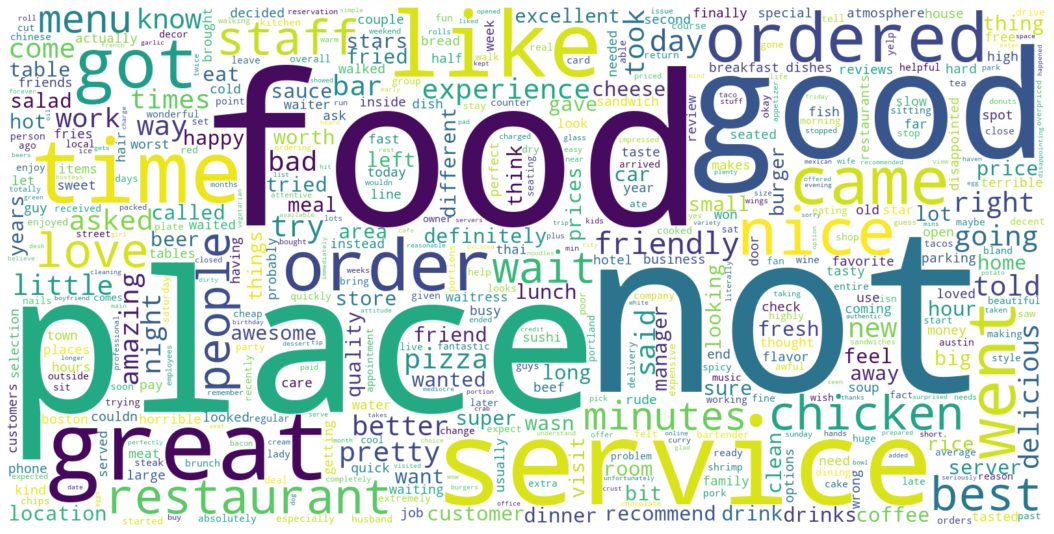

In [ ]:
word_cloud_f (df)

In [ ]:
#negative reviews from test dataset
df_neg = df[(df['y_true'] == 0)]
df_neg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038 entries, 1 to 4081
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               2038 non-null   object
 1   categories         2038 non-null   object
 2   length             2038 non-null   int64 
 3   clean_review       2038 non-null   object
 4   y_true             2038 non-null   int64 
 5   y_pred_cnn         2038 non-null   int64 
 6   y_pred_lstm        2038 non-null   int64 
 7   y_pred_bert        2038 non-null   int64 
 8   y_pred_bert_keras  2038 non-null   int64 
 9   pad_50_sen         2038 non-null   object
dtypes: int64(6), object(4)
memory usage: 175.1+ KB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


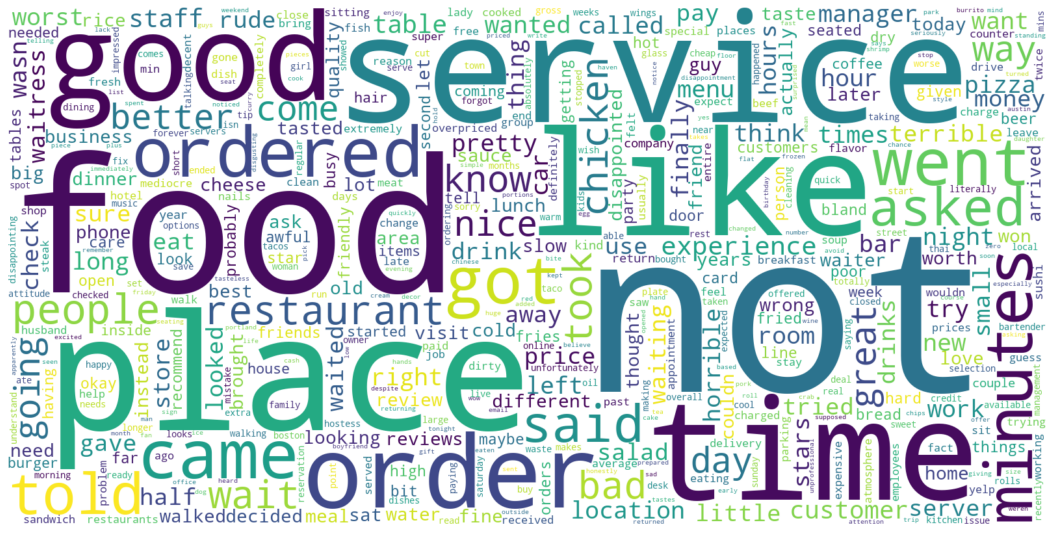

In [ ]:
word_cloud_f(df_neg)

In [ ]:
#negative reviews from test dataset
df_pos = df[(df['y_true'] == 1)]
df_pos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 4082
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               2045 non-null   object
 1   categories         2045 non-null   object
 2   length             2045 non-null   int64 
 3   clean_review       2045 non-null   object
 4   y_true             2045 non-null   int64 
 5   y_pred_cnn         2045 non-null   int64 
 6   y_pred_lstm        2045 non-null   int64 
 7   y_pred_bert        2045 non-null   int64 
 8   y_pred_bert_keras  2045 non-null   int64 
 9   pad_50_sen         2045 non-null   object
dtypes: int64(6), object(4)
memory usage: 175.7+ KB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


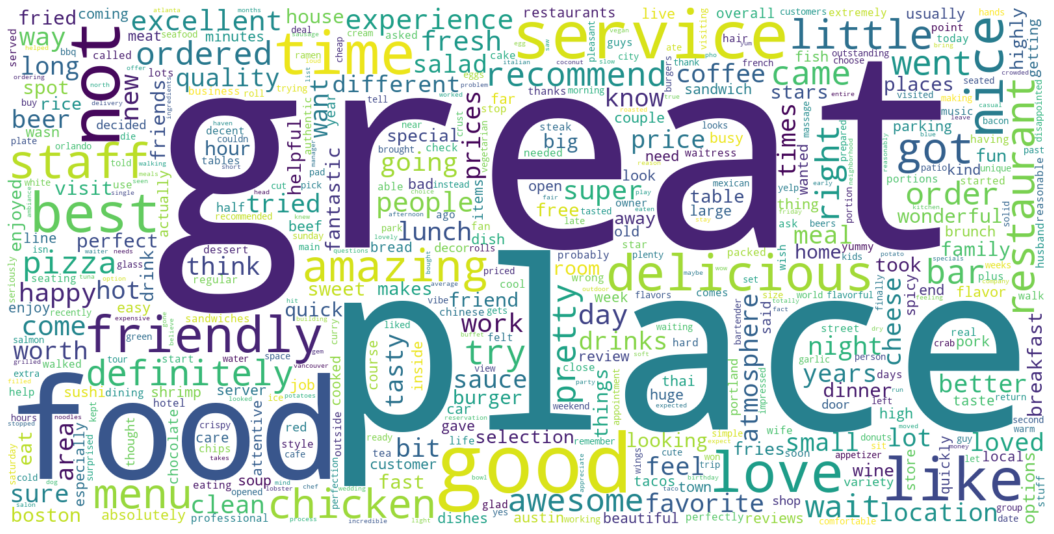

In [ ]:
word_cloud_f(df_pos)

In [ ]:
#True Negative Reviews
df_true_negative = df[(df['y_true'] == 0) & (df['y_pred_cnn'] ==0)& (df['y_pred_lstm'] ==0)& (df['y_pred_bert'] ==0)& (df['y_pred_bert_keras'] ==0)]
df_true_negative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1750 entries, 1 to 4081
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               1750 non-null   object
 1   categories         1750 non-null   object
 2   length             1750 non-null   int64 
 3   clean_review       1750 non-null   object
 4   y_true             1750 non-null   int64 
 5   y_pred_cnn         1750 non-null   int64 
 6   y_pred_lstm        1750 non-null   int64 
 7   y_pred_bert        1750 non-null   int64 
 8   y_pred_bert_keras  1750 non-null   int64 
 9   pad_50_sen         1750 non-null   object
dtypes: int64(6), object(4)
memory usage: 150.4+ KB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


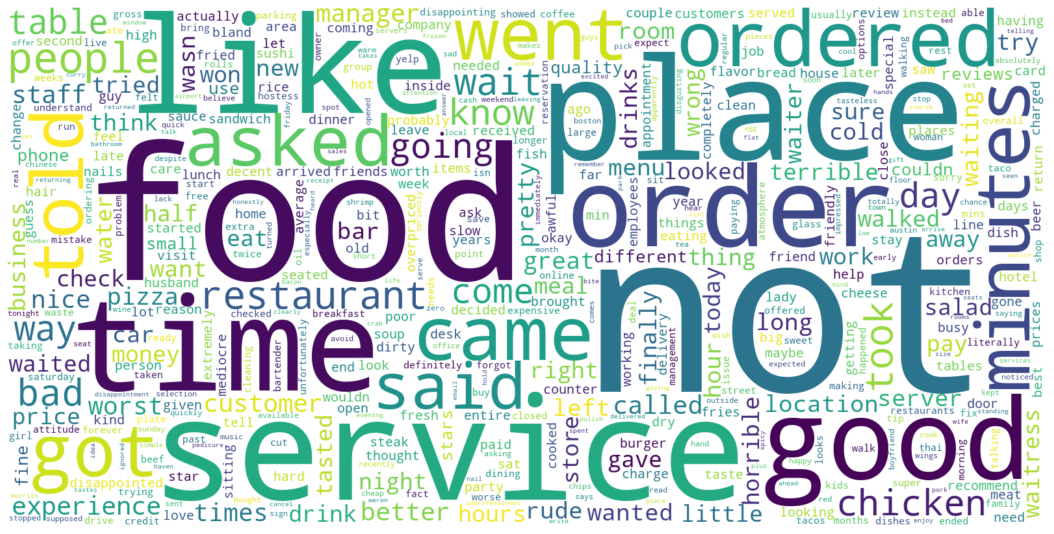

In [ ]:
word_cloud_f(df_true_negative)

In [ ]:
#True Positive Review
df_true_positive = df[(df['y_true'] == 1) & (df['y_pred_cnn'] ==1)& (df['y_pred_lstm'] ==1)& (df['y_pred_bert'] ==1)& (df['y_pred_bert_keras'] ==1)]
df_true_positive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1561 entries, 0 to 4072
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               1561 non-null   object
 1   categories         1561 non-null   object
 2   length             1561 non-null   int64 
 3   clean_review       1561 non-null   object
 4   y_true             1561 non-null   int64 
 5   y_pred_cnn         1561 non-null   int64 
 6   y_pred_lstm        1561 non-null   int64 
 7   y_pred_bert        1561 non-null   int64 
 8   y_pred_bert_keras  1561 non-null   int64 
 9   pad_50_sen         1561 non-null   object
dtypes: int64(6), object(4)
memory usage: 134.1+ KB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


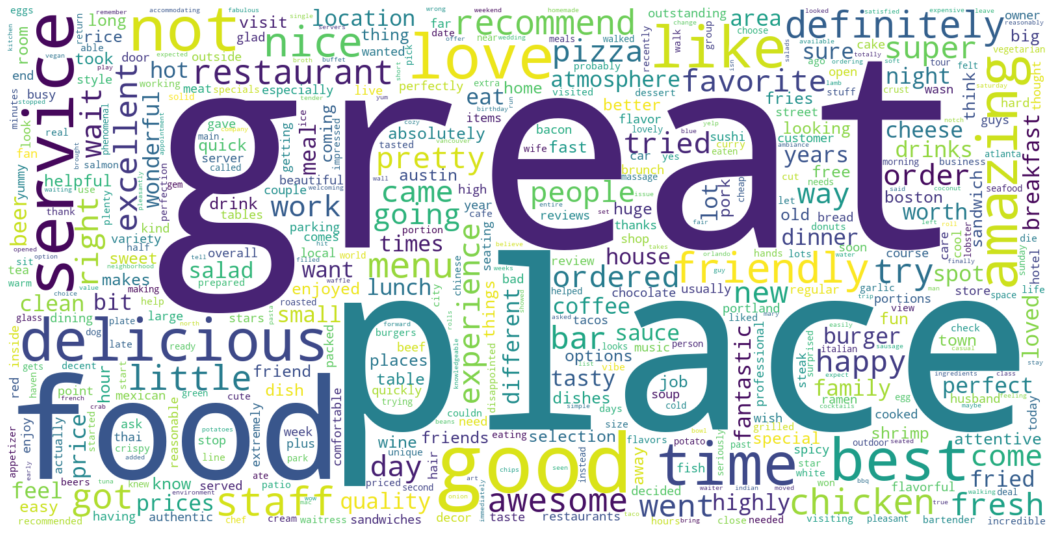

In [ ]:
word_cloud_f(df_true_positive)

In [ ]:
#False Negative Reviews
df_false_negative = df[(df['y_true'] == 1) & (df['y_pred_cnn'] ==0)& (df['y_pred_lstm'] ==0)& (df['y_pred_bert'] ==0)& (df['y_pred_bert_keras'] ==0)]
df_false_negative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 122 to 4039
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               50 non-null     object
 1   categories         50 non-null     object
 2   length             50 non-null     int64 
 3   clean_review       50 non-null     object
 4   y_true             50 non-null     int64 
 5   y_pred_cnn         50 non-null     int64 
 6   y_pred_lstm        50 non-null     int64 
 7   y_pred_bert        50 non-null     int64 
 8   y_pred_bert_keras  50 non-null     int64 
 9   pad_50_sen         50 non-null     object
dtypes: int64(6), object(4)
memory usage: 4.3+ KB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


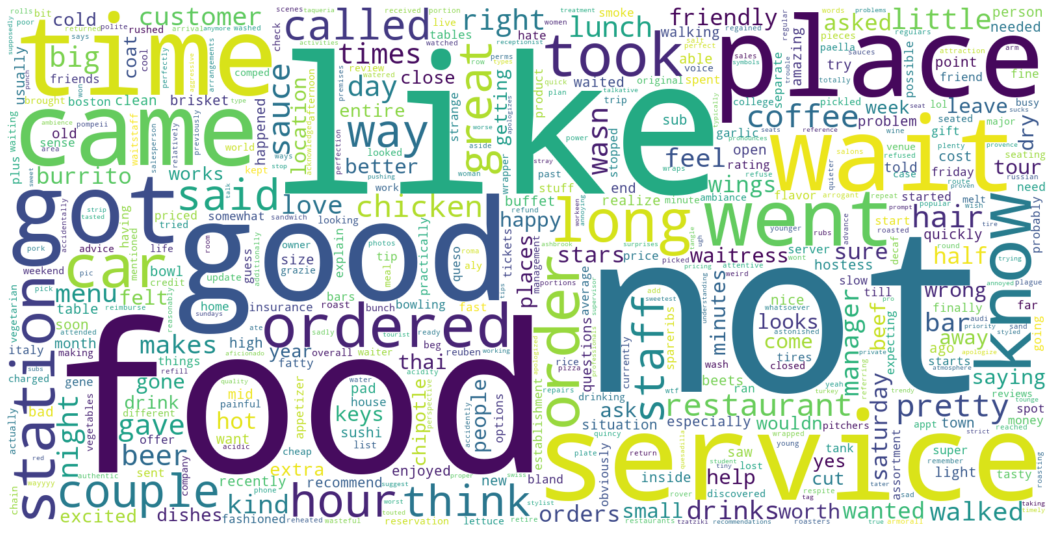

In [ ]:
word_cloud_f(df_false_negative)

In [ ]:
#False Positive Reviews
df_false_positive = df[(df['y_true'] == 0) & (df['y_pred_cnn'] ==1)& (df['y_pred_lstm'] ==1)& (df['y_pred_bert'] ==1)& (df['y_pred_bert_keras'] ==1)]
df_false_positive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 116 to 4048
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               26 non-null     object
 1   categories         26 non-null     object
 2   length             26 non-null     int64 
 3   clean_review       26 non-null     object
 4   y_true             26 non-null     int64 
 5   y_pred_cnn         26 non-null     int64 
 6   y_pred_lstm        26 non-null     int64 
 7   y_pred_bert        26 non-null     int64 
 8   y_pred_bert_keras  26 non-null     int64 
 9   pad_50_sen         26 non-null     object
dtypes: int64(6), object(4)
memory usage: 2.2+ KB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


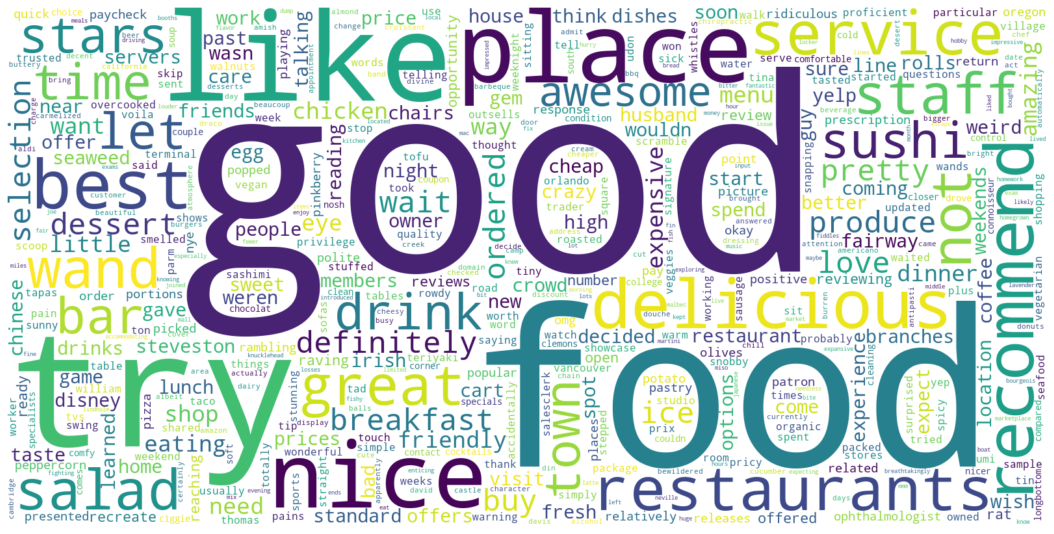

In [ ]:
word_cloud_f(df_false_positive)

Here we take a look to the reviews that are classified differently from one classifier to another

In [ ]:
#negative reviews randomly classified
df_test = pd.merge(df_neg, df_true_negative, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
df_negative_randomly_classified = pd.merge(df_test, df_false_positive, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [ ]:
df_negative_randomly_classified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 287
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               262 non-null    object
 1   categories         262 non-null    object
 2   length             262 non-null    int64 
 3   clean_review       262 non-null    object
 4   y_true             262 non-null    int64 
 5   y_pred_cnn         262 non-null    int64 
 6   y_pred_lstm        262 non-null    int64 
 7   y_pred_bert        262 non-null    int64 
 8   y_pred_bert_keras  262 non-null    int64 
 9   pad_50_sen         262 non-null    object
dtypes: int64(6), object(4)
memory usage: 22.5+ KB


In [ ]:
#Check which classifier makes more wrong prediction for negative class
cnn = df_negative_randomly_classified[df_negative_randomly_classified['y_pred_cnn'] ==1].shape[0]
lstm = df_negative_randomly_classified[df_negative_randomly_classified['y_pred_lstm'] ==1].shape[0]
bert = df_negative_randomly_classified[df_negative_randomly_classified['y_pred_bert'] ==1].shape[0]
bert_keras = df_negative_randomly_classified[df_negative_randomly_classified['y_pred_bert_keras'] ==1].shape[0]
print('CNN:', cnn, '\nLSTM:', lstm, '\nBERT:', bert, '\nBERT_keras:', bert_keras )

#it looks like more wrong prediction for negative class come from LSTM, followed by CNN, BERT_keras and BERT

CNN: 106 
LSTM: 143 
BERT: 88 
BERT_keras: 112


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


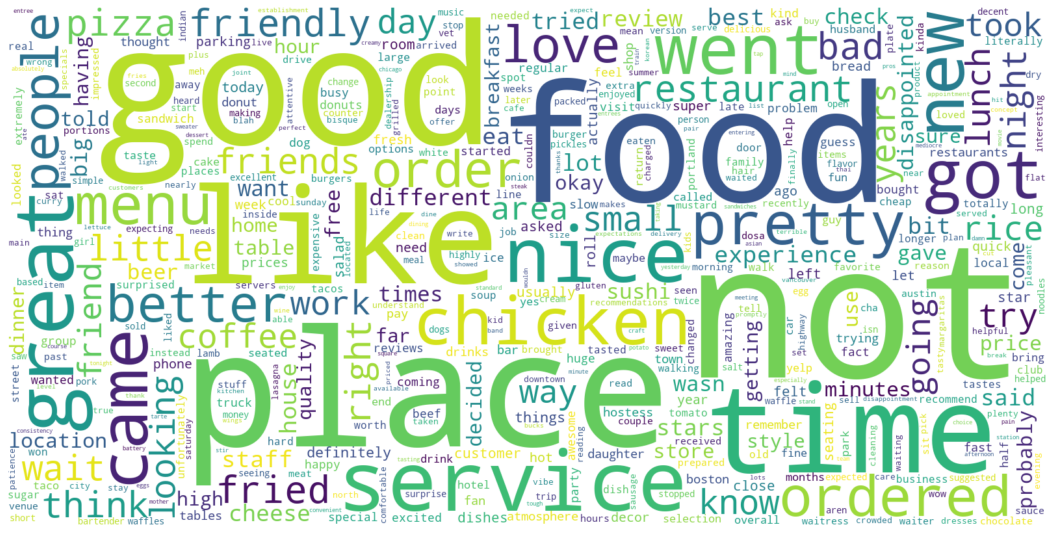

In [ ]:
word_cloud_f(df_negative_randomly_classified)

In [ ]:
#positive reviews randomly classified
df_test = pd.merge(df_pos, df_true_positive, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
df_positive_randomly_classified = pd.merge(df_test, df_false_negative, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [ ]:
df_positive_randomly_classified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 0 to 483
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               434 non-null    object
 1   categories         434 non-null    object
 2   length             434 non-null    int64 
 3   clean_review       434 non-null    object
 4   y_true             434 non-null    int64 
 5   y_pred_cnn         434 non-null    int64 
 6   y_pred_lstm        434 non-null    int64 
 7   y_pred_bert        434 non-null    int64 
 8   y_pred_bert_keras  434 non-null    int64 
 9   pad_50_sen         434 non-null    object
dtypes: int64(6), object(4)
memory usage: 37.3+ KB


In [ ]:
#Check which classifier makes more wrong prediction for positive class
cnn = df_positive_randomly_classified[df_positive_randomly_classified['y_pred_cnn'] ==0].shape[0]
lstm = df_positive_randomly_classified[df_positive_randomly_classified['y_pred_lstm'] ==0].shape[0]
bert = df_positive_randomly_classified[df_positive_randomly_classified['y_pred_bert'] ==0].shape[0]
bert_keras = df_positive_randomly_classified[df_positive_randomly_classified['y_pred_bert_keras'] ==0].shape[0]
print('CNN:', cnn, '\nLSTM:', lstm, '\nBERT:', bert, '\nBERT_keras:', bert_keras )

#it looks like more wrong prediction for positive class come from CNN, followed by LSTM, BERT_keras and BERT

CNN: 312 
LSTM: 149 
BERT: 81 
BERT_keras: 135


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


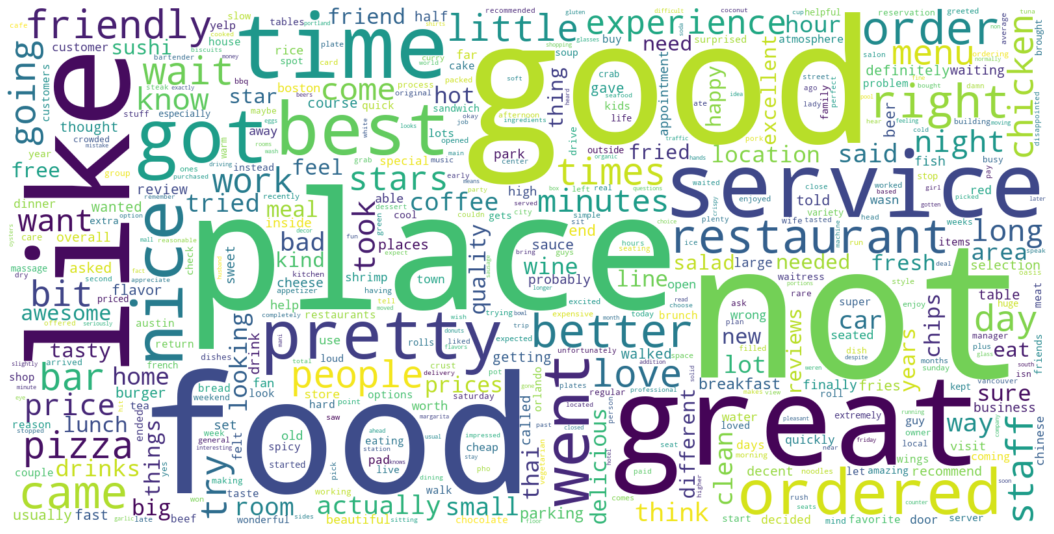

In [ ]:
word_cloud_f(df_positive_randomly_classified)

**Sample Selection**

A sample of 50 reviews correctly predicted positive and 50 reviews correctly predicted negative, with a coenfidence higher than 80% is selected.

In [ ]:
#read the files with prediction as propabilitis

cnn_propab = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/cnn_pred_propab', 'rb')) 
lstm_propab = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/lstm_pred_propab', 'rb'))
bert_propab = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/bert_1_pred_propab', 'rb'))
bert_keras_propab = pickle.load(open('/content/drive/MyDrive/MasterThesis/Dataset/bert_keras_pred_propab', 'rb'))

In [ ]:
#predicting POSITIVE clas with coenfidence over 0.8
#create the list
l_cnn = []
l_lstm = []
l_bert = []
l_bert_k = []

for i in range(len(cnn_propab)):
  if cnn_propab[i]>0.8:
    l_cnn.append(i)

for i in range(len(lstm_propab)):
  if lstm_propab[i]>0.8:
    l_lstm.append(i)

for i in range(len(bert_propab)):
  if bert_propab[i][1]>0.8:
    l_bert.append(i)

for i in range(len(bert_keras_propab)):
  if bert_keras_propab[i][1]>0.8:
    l_bert_k.append(i)    

#get the list of the reviews predicted positive with a coenfidence higher then 0.8 for all models

list1_as_set = set(l_cnn)
intersection = list1_as_set.intersection(l_lstm)

c = l_bert
list1_as_set = set(intersection)
intersection = list1_as_set.intersection(c)

d = l_bert_k
list1_as_set = set(intersection)
intersection = list1_as_set.intersection(d)

sample = random.sample(intersection, 50)

with open('/content/drive/MyDrive/MasterThesis/Dataset/positive_sample_50', 'wb') as f:
    pickle.dump(sample, f)    

In [ ]:
#predicting NEGATIVE class with coenfidence over 0.8
#create the list
l_cnn =[]
l_lstm = []
l_bert = []
l_bert_k = []

for i in range(len(cnn_propab)):
  if cnn_propab[i]<0.2:
    l_cnn.append(i)

for i in range(len(lstm_propab)):
  if lstm_propab[i]<0.2:
    l_lstm.append(i)

for i in range(len(bert_propab)):
  if bert_propab[i][0]>0.2:
    l_bert.append(i)

for i in range(len(bert_keras_propab)):
  if bert_keras_propab[i][0]>0.2:
    l_bert_k.append(i)    

#get the list of the reviews predicted negative with a coenfidence higher then 0.8 for all models


list1_as_set = set(l_cnn)
intersection = list1_as_set.intersection(l_lstm)

c = l_bert
list1_as_set = set(intersection)
intersection = list1_as_set.intersection(c)

d = l_bert_k
list1_as_set = set(intersection)
intersection = list1_as_set.intersection(d)

sample = random.sample(intersection, 50)

with open('/content/drive/MyDrive/MasterThesis/Dataset/negative_sample_50', 'wb') as f:
    pickle.dump(sample, f)    